<a href="https://colab.research.google.com/github/yaseminozturk9/bby261FinalProjesi/blob/master/handwritten-recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


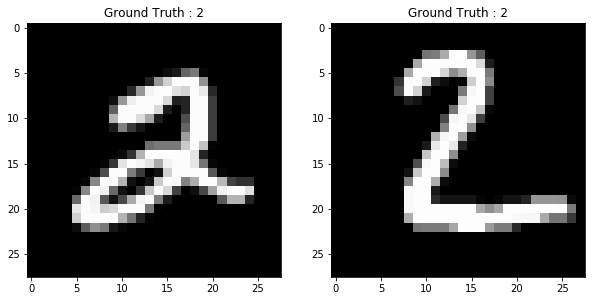

In [154]:
from keras.utils import to_categorical
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
# Find the unique numbers from the trpy ain labels

classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Eğitim setindeki ilk resimi çizdirelim
plt.subplot(121)
plt.imshow(train_images[5, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[5]))

# Test setindeki ilk resimi çizdirelim
plt.subplot(122)
plt.imshow(test_images[1, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))
plt.show()

In [0]:
# Change from matrix to array of dimension 28x28 to array of #dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [0]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [166]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[5])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  2
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [161]:
history = model.fit(train_data, train_labels_one_hot,batch_size=256, epochs=20, verbose=1, validation_data(test_data,test_labels_one_hot))

SyntaxError: ignored

In [167]:
print(history.history.keys())
[test_loss, test_acc] =model.evaluate(test_data,test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy {}".format(test_loss, test_acc))

NameError: ignored

In [0]:
# Plot the Loss Curves
plt.subplot(121)
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')

# Plot the Accuracy Curves
plt.subplot(122)
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.show()

In [0]:
#dropout için yeniden düzenleme
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

In [0]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,validation_data=(test_data, test_labels_one_hot))

# Plot the Loss Curves
plt.figure(figsize=[8, 6])
plt.plot(history_reg.history['loss'], 'r', linewidth=3.0)
plt.plot(history_reg.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Plot the Accuracy Curves
plt.figure(figsize=[8, 6])
plt.plot(history_reg.history['acc'], 'r', linewidth=3.0)
plt.plot(history_reg.history['val_acc'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [0]:
# Predict the most likely class
model_reg.predict_classes(test_data[[50],:])

In [0]:
# # Predict the probabilities for each class
 model_reg.predict(test_data[[50],:])